# Comparing ANN with CNN using cifar 10 dataset

# Cifar 10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
#### Image 
![](image.png)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading dataset and storing in variables
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 177s 1us/step


In [6]:
#size of dataset
x_train.shape ,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [8]:
#converting 2d array to 1d array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [14]:
y_train[:9],y_test

(array([6, 9, 9, 4, 1, 1, 2, 7, 8], dtype=uint8),
 array([3, 8, 8, ..., 5, 1, 7], dtype=uint8))

In [12]:
#classes present in dataset
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
#function to plot image 
def plot_image(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

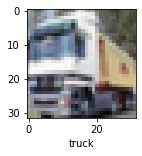

In [24]:
plot_image(x_train,y_train,1)

### Normalizing

In [27]:
#it sets the input value between 0 & 1
x_train = x_train / 255.0
x_test = x_test / 255.0

## ANN Model

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 40ms/step - loss: 1.8125 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 65s 41ms/step - loss: 1.6226 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5400 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4810 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4342 - accuracy: 0.4970


## ConfusionMatrix and Classification Report

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes,target_names = classes))

Classification Report: 
               precision    recall  f1-score   support

    airplane       0.53      0.59      0.56      1000
  automobile       0.63      0.58      0.61      1000
        bird       0.44      0.24      0.31      1000
         cat       0.43      0.19      0.26      1000
        deer       0.48      0.34      0.40      1000
         dog       0.45      0.34      0.39      1000
        frog       0.41      0.74      0.53      1000
       horse       0.49      0.62      0.55      1000
        ship       0.53      0.68      0.59      1000
       truck       0.53      0.58      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



In [38]:
print(confusion_matrix(y_test,y_pred_classes))

[[586  33  44   3  24  12  39  38 179  42]
 [ 46 584   3  10  11   9  28  39 105 165]
 [ 95  28 241  49 106  82 234 105  42  18]
 [ 58  29  43 186  38 179 245  98  41  83]
 [ 69  16  81  18 344  38 245 137  33  19]
 [ 33  21  54 103  58 342 183 125  42  39]
 [ 16  11  26  19  65  27 745  50  20  21]
 [ 40  14  35  31  49  47  56 624  32  72]
 [118  56  11   6  11  17  25  22 679  55]
 [ 47 138   5  12  10  15  38  43 114 578]]


## CNN Model

In [39]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 1.4934 - accuracy: 0.4611
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1524 - accuracy: 0.5958
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0156 - accuracy: 0.6453
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9296 - accuracy: 0.6798
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8654 - accuracy: 0.69900s - loss: 0.8
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8124 - accuracy: 0.7189
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7675 - accuracy: 0.7334
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7205 - accuracy: 0.7496
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6796 - accuracy: 0.7637
Epoch 10/10
1563/1563 [===========================

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes,target_names = classes))

Classification Report: 
               precision    recall  f1-score   support

    airplane       0.66      0.81      0.73      1000
  automobile       0.83      0.80      0.81      1000
        bird       0.60      0.59      0.60      1000
         cat       0.61      0.39      0.47      1000
        deer       0.57      0.76      0.65      1000
         dog       0.59      0.63      0.61      1000
        frog       0.83      0.76      0.79      1000
       horse       0.73      0.76      0.75      1000
        ship       0.80      0.77      0.79      1000
       truck       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [49]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9182 - accuracy: 0.6995


[0.9182299971580505, 0.6995000243186951]

#### By seeing the accuracy of the models we can clearly say that CNN gives much better results than ANN while dealing with <br>
#### image models & also the ANN takes more computational power but it is compromised in CNN due to maxpooling layers.